In [419]:
import random
import numpy as np
import timeit
import pandas as pd
import matplotlib.pyplot as plt
from citipy import citipy

import requests
from config import weather_api_key

# Import the datetime module from the datetime library.
from datetime import datetime

In [394]:
round(random.random(),2)

0.86

In [395]:
random.randint(-10,10)

7

In [396]:
random.randrange(0,99,5)

5

In [397]:
random.uniform(-10,10)

9.318485592907908

In [398]:
x = 1
latitudes = []
while x < 11:
    random_lat = random.uniform(-90,90)
    latitudes.append(random_lat)
    x += 1

In [399]:
for x in latitudes:
    print(round(x,3))

72.734
42.853
-34.862
-18.117
-34.248
-81.204
42.427
-20.17
63.323
53.807


In [400]:
x = 1
longitudes = []
while x < 11:
    random_long = random.uniform(-90,90)
    longitudes.append(random_long)
    x += 1

In [401]:
for x in longitudes:
    print(round(x,3))

11.087
50.168
-76.898
-41.005
-29.734
-15.19
-45.739
52.583
52.04
-84.615


In [402]:
%timeit np.random.uniform(low=-90, high=90, size=1500)

12.1 µs ± 150 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [403]:
def latitudes(size):
    latitudes = []
    x = 0
    while x < (size):
        random_lat = random.uniform(-90,90)
        latitudes.append(random_lat)
        x += 1
    return latitudes
# Call the function with 1500.

%timeit latitudes(1500)

479 µs ± 17.8 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [404]:
def latitudes(size):
    latitudes = []
    x = 0
    while x < (size):
        random_lat = random.randint(-90,90) + random.random()
        latitudes.append(random_lat)
        x += 1
    return latitudes
# Call the function with 1500.

latitudes(5)

[10.877251732444075,
 5.064424883868415,
 81.28999980738679,
 74.56588291746776,
 4.087905648807363]

In [405]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90, high=90, size=1200)
longs = np.random.uniform(low=-90, high=90, size=1200)
latlongs = zip(lats, longs)
latlongs

In [406]:
# Add the latitudes and longitudes to a list.
coordinates = list(latlongs)
print(coordinates[:3])

[(55.76718596226641, -10.648231177618882), (-79.55357375936605, 67.6296769897435), (3.6098780708371976, 71.22109368230636)]


In [407]:
# Create a list for holding the cities.
cities = []
countries = []
full_location = zip(cities, countries)
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    #city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name, citipy.nearest_city(coordinate[0], coordinate[1]).country_code
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

539

In [408]:
cities[:5]

['ballina', 'taolanaro', 'mahibadhoo', 'tocopilla', 'canutama']

In [409]:
first_city = cities[0]
first_city

'ballina'

In [410]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7ed6207ebdf7a3629fda9718ad01bfb3&q="

In [411]:
query_url = url + first_city
print(query_url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7ed6207ebdf7a3629fda9718ad01bfb3&q=ballina


In [412]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [413]:
# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + cities[i]

In [414]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 11 | ballina
Processing Record 2 of Set 11 | taolanaro
City not found. Skipping...
Processing Record 3 of Set 11 | mahibadhoo
Processing Record 4 of Set 11 | tocopilla
Processing Record 5 of Set 11 | canutama
Processing Record 6 of Set 11 | nador
Processing Record 7 of Set 11 | illoqqortoormiut
City not found. Skipping...
Processing Record 8 of Set 11 | buchanan
Processing Record 9 of Set 11 | douentza
Processing Record 10 of Set 11 | puerto del rosario
Processing Record 11 of Set 11 | sovetskiy
Processing Record 12 of Set 11 | turukhansk
Processing Record 13 of Set 11 | hermanus
Processing Record 14 of Set 11 | ushuaia
Processing Record 15 of Set 11 | skibbereen
Processing Record 16 of Set 11 | kudahuvadhoo
Processing Record 17 of Set 11 | castro
Processing Record 18 of Set 11 | marcona
City not found. Skipping...
Processing Record 19 of Set 11 | hamilton
Processing Record 20 of Set 11 | arraial do cabo
Processing Record 21 of Set 11 | lebu
Processing Record

Processing Record 38 of Set 14 | carutapera
Processing Record 39 of Set 14 | saint-georges
Processing Record 40 of Set 14 | sur
Processing Record 41 of Set 14 | hofn
Processing Record 42 of Set 14 | barentsburg
City not found. Skipping...
Processing Record 43 of Set 14 | naberera
Processing Record 44 of Set 14 | qaqortoq
Processing Record 45 of Set 14 | mokhotlong
Processing Record 46 of Set 14 | calama
Processing Record 47 of Set 14 | santa maria
Processing Record 48 of Set 14 | lakewood
Processing Record 49 of Set 14 | muros
Processing Record 50 of Set 14 | olafsvik
Processing Record 1 of Set 15 | talnakh
Processing Record 2 of Set 15 | vila velha
Processing Record 3 of Set 15 | bambous virieux
Processing Record 4 of Set 15 | narsaq
Processing Record 5 of Set 15 | prochnookopskaya
Processing Record 6 of Set 15 | marienburg
Processing Record 7 of Set 15 | constitucion
Processing Record 8 of Set 15 | awjilah
Processing Record 9 of Set 15 | aviles
Processing Record 10 of Set 15 | knysna

Processing Record 27 of Set 18 | jiblah
Processing Record 28 of Set 18 | laguna
Processing Record 29 of Set 18 | mahon
Processing Record 30 of Set 18 | plettenberg bay
Processing Record 31 of Set 18 | hargeysa
Processing Record 32 of Set 18 | taguatinga
Processing Record 33 of Set 18 | darab
Processing Record 34 of Set 18 | sumbe
Processing Record 35 of Set 18 | severnyy
Processing Record 36 of Set 18 | dzilam gonzalez
Processing Record 37 of Set 18 | preili
Processing Record 38 of Set 18 | rocha
Processing Record 39 of Set 18 | bonthe
Processing Record 40 of Set 18 | bolungarvik
City not found. Skipping...
Processing Record 41 of Set 18 | saint-pierre
Processing Record 42 of Set 18 | desnogorsk
Processing Record 43 of Set 18 | velingara
Processing Record 44 of Set 18 | kitob
Processing Record 45 of Set 18 | kankavli
City not found. Skipping...
Processing Record 46 of Set 18 | lindenhurst
Processing Record 47 of Set 18 | molodizhne
Processing Record 48 of Set 18 | kot samaba
Processing

In [415]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ballina,-28.8667,153.5667,71.60,64,40,9.22,AU,2021-01-10 14:31:34
1,Mahibadhoo,3.7833,72.9667,82.13,69,83,7.16,MV,2021-01-10 14:31:35
2,Tocopilla,-22.0920,-70.1979,72.41,57,69,7.16,CL,2021-01-10 14:31:35
3,Canutama,-6.5339,-64.3831,89.62,55,36,3.42,BR,2021-01-10 14:31:35
4,Nador,35.1740,-2.9287,55.40,62,20,5.75,MA,2021-01-10 14:31:35
5,Buchanan,5.8808,-10.0467,91.40,62,75,4.61,LR,2021-01-10 14:31:36
6,Douentza,14.9951,-2.9517,99.01,8,0,11.07,ML,2021-01-10 14:31:36
7,Puerto Del Rosario,28.5004,-13.8627,66.20,55,75,17.27,ES,2021-01-10 14:31:36
8,Sovetskiy,61.3614,63.5842,-15.50,89,95,6.33,RU,2021-01-10 14:29:28
9,Turukhansk,65.8167,87.9833,-18.94,82,0,5.73,RU,2021-01-10 14:31:37


In [481]:
nador = city_data_df.loc[(city_data_df['Wind Speed'] == 5.75) & (city_data_df['City'] == 'Nador')]
nador

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
4,Nador,MA,2021-01-10 14:31:35,35.174,-2.9287,55.4,62,20,5.75


In [489]:
windy = city_data_df.loc[(city_data_df['Wind Speed'] >= 12.75)]
windy = windy.sort_values(['Wind Speed'], ascending=False)
windy

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
101,Cape Town,ZA,2021-01-10 14:31:46,-33.9258,18.4232,75.00,53,20,31.07
216,Luderitz,NA,2021-01-10 14:31:56,-26.6481,15.1594,74.77,55,28,30.22
294,Nouadhibou,MR,2021-01-10 14:32:03,20.9310,-17.0347,71.60,35,0,27.63
211,Nouakchott,MR,2021-01-10 14:31:56,18.0858,-15.9785,75.20,29,0,26.46
235,Carnarvon,AU,2021-01-10 14:31:58,-24.8667,113.6333,78.80,78,0,26.46
...,...,...,...,...,...,...,...,...,...
302,Sinnamary,GF,2021-01-10 14:32:03,5.3833,-52.9500,81.77,77,9,13.24
349,Cervo,ES,2021-01-10 14:32:07,43.6702,-7.4101,50.00,70,100,13.00
408,Sharan,RU,2021-01-10 14:32:13,54.8167,54.0000,24.48,97,99,12.97
464,Villa Maria,AR,2021-01-10 14:32:18,-32.4075,-63.2402,94.37,30,0,12.91


In [416]:
city_data_df = city_data_df[['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Ballina,AU,2021-01-10 14:31:34,-28.8667,153.5667,71.60,64,40,9.22
1,Mahibadhoo,MV,2021-01-10 14:31:35,3.7833,72.9667,82.13,69,83,7.16
2,Tocopilla,CL,2021-01-10 14:31:35,-22.0920,-70.1979,72.41,57,69,7.16
3,Canutama,BR,2021-01-10 14:31:35,-6.5339,-64.3831,89.62,55,36,3.42
4,Nador,MA,2021-01-10 14:31:35,35.1740,-2.9287,55.40,62,20,5.75
...,...,...,...,...,...,...,...,...,...
497,Lafia,NG,2021-01-10 14:32:21,8.4833,8.5167,99.63,9,53,4.72
498,Newtownards,GB,2021-01-10 14:32:21,54.5924,-5.6909,42.80,87,40,11.50
499,Mormugao,IN,2021-01-10 14:32:21,15.4000,73.8000,82.40,78,20,5.75
500,Bismil,TR,2021-01-10 14:32:21,37.8486,40.6658,50.00,50,0,1.05


In [420]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

Text(0, 0.5, 'Max Temperature (F)')

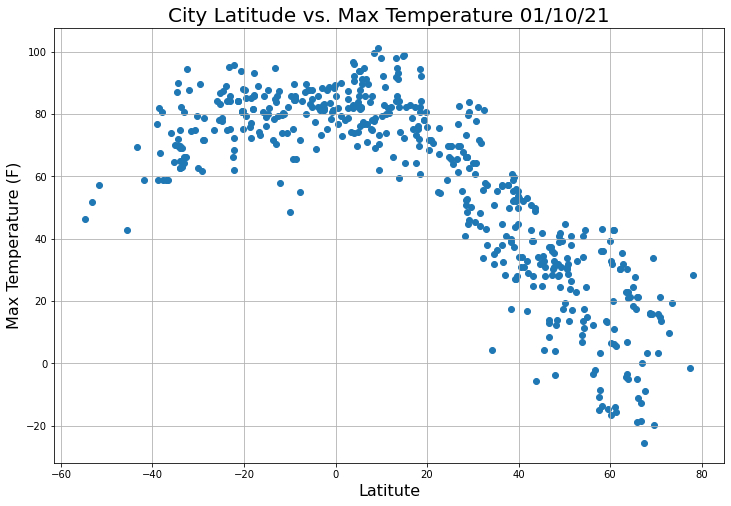

In [428]:
plt.subplots(figsize=(12,8))

plt.scatter(city_data_df['Lat'],city_data_df['Max Temp'])
plt.title('City Latitude vs. Max Temperature 01/10/21', fontsize=20)
plt.grid()
plt.xlabel('Latitute', fontsize=16)
plt.ylabel('Max Temperature (F)', fontsize=16)

In [429]:
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [431]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.strftime("%x")
today

'01/10/21'

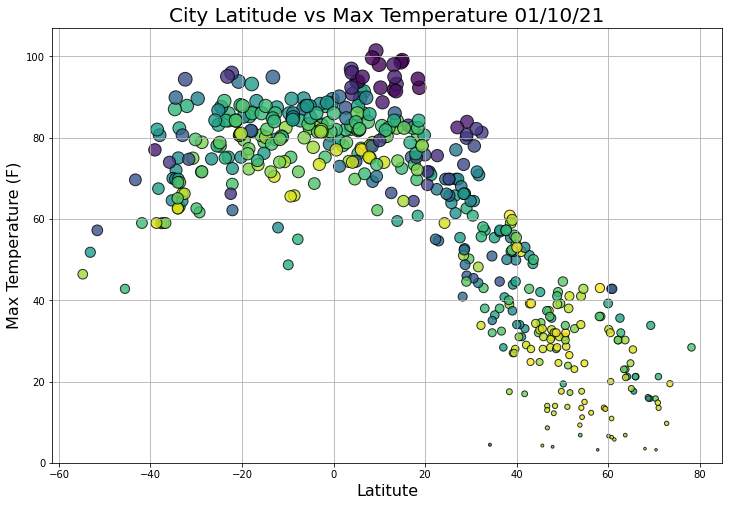

In [469]:
plt.subplots(figsize=(12,8))

vcolor=[str(item/255.) for item in city_data_df['Max Temp']]


plt.scatter(city_data_df['Lat'],
            city_data_df['Max Temp'],
            linewidths=1,
            alpha=0.8,
            c=city_data_df['Humidity'],
            edgecolor='black',
            marker='o',
            s=city_data_df['Max Temp'] * 2,
            label='Cities')
plt.title(f'City Latitude vs Max Temperature {today}', fontsize=20)
plt.grid()
plt.xlabel('Latitute', fontsize=16)
plt.ylabel('Max Temperature (F)', fontsize=16)
plt.ylim(0,107)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

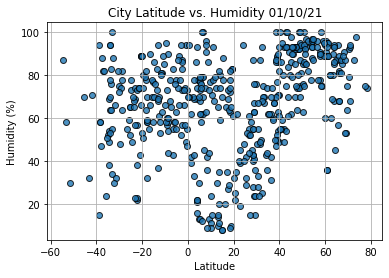

In [490]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

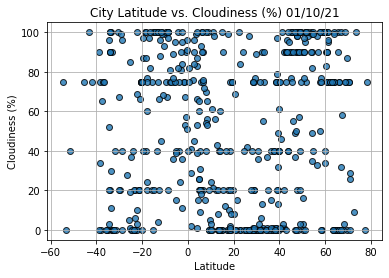

In [491]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

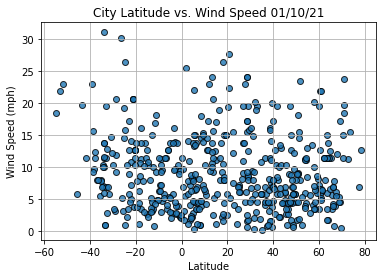

In [492]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()